<a href="https://colab.research.google.com/github/xadicavadzade/kmeans/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('/content/processed_segmentation.xlsx')
df

,Age,Work_Experience,Family_Size,Segmentation,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_B,Profession_C,Profession_D,Spending_Score_High,Spending_Score_Low,Var_1_B,Var_1_C,Var_1_D
0,22,1.000000,4.0,D,1,0,0,0.075826,0.109610,0.734985,0,1,0.213039,0.100092,0.381084
1,38,2.641663,3.0,A,0,1,1,0.270386,0.107296,0.251788,0,0,0.213039,0.100092,0.381084
2,67,1.000000,1.0,B,0,1,1,0.270386,0.107296,0.251788,0,1,0.234287,0.285472,0.248400
3,67,0.000000,2.0,B,1,1,1,0.253612,0.224719,0.205457,1,0,0.234287,0.285472,0.248400
4,40,2.641663,6.0,A,0,1,1,0.232877,0.155954,0.226554,1,0,0.234287,0.285472,0.248400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,22,0.000000,7.0,D,1,0,0,0.294697,0.410227,0.071212,0,1,0.195489,0.195489,0.375940
8064,35,3.000000,4.0,D,1,0,0,0.305509,0.292154,0.193656,0,1,0.213039,0.100092,0.381084
8065,33,1.000000,1.0,D,0,0,1,0.075826,0.109610,0.734985,0,1,0.234287,0.285472,0.248400
8066,27,1.000000,4.0,B,0,0,1,0.075826,0.109610,0.734985,0,1,0.234287,0.285472,0.248400


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  8068 non-null   int64  
 1   Work_Experience      8068 non-null   float64
 2   Family_Size          8068 non-null   float64
 3   Segmentation         8068 non-null   object 
 4   Gender_Male          8068 non-null   int64  
 5   Ever_Married_Yes     8068 non-null   int64  
 6   Graduated_Yes        8068 non-null   int64  
 7   Profession_B         8068 non-null   float64
 8   Profession_C         8068 non-null   float64
 9   Profession_D         8068 non-null   float64
 10  Spending_Score_High  8068 non-null   int64  
 11  Spending_Score_Low   8068 non-null   int64  
 12  Var_1_B              8068 non-null   float64
 13  Var_1_C              8068 non-null   float64
 14  Var_1_D              8068 non-null   float64
dtypes: float64(8), int64(6), object(1)
mem

In [ ]:
df.describe()

,Age,Work_Experience,Family_Size,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_B,Profession_C,Profession_D,Spending_Score_High,Spending_Score_Low,Var_1_B,Var_1_C,Var_1_D
count,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000
mean,43.466906,2.641663,2.850123,0.547471,0.592836,0.625434,0.230293,0.244175,0.281111,0.150719,0.604611,0.230293,0.244175,0.281111
std,16.711696,3.226972,1.499278,0.497772,0.491336,0.484041,0.080824,0.126378,0.231076,0.357797,0.488964,0.010197,0.065681,0.049282
min,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.075826,0.107296,0.071212,0.000000,0.000000,0.195489,0.100092,0.248400
25%,30.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.207849,0.109610,0.071212,0.000000,0.000000,0.226277,0.195489,0.248400
50%,40.000000,1.000000,2.850123,1.000000,1.000000,1.000000,0.253612,0.203488,0.226554,0.000000,1.000000,0.234287,0.285472,0.248400
75%,53.000000,4.000000,4.000000,1.000000,1.000000,1.000000,0.294697,0.410227,0.299419,0.000000,1.000000,0.234287,0.285472,0.315085
max,89.000000,14.000000,9.000000,1.000000,1.000000,1.000000,0.305509,0.410227,0.734985,1.000000,1.000000,0.251185,0.285472,0.381084


In [ ]:
if "Segmentation" in df.columns:
    true_labels = df["Segmentation"]
    X = df.drop("Segmentation", axis=1)
else:
    X = df

In [ ]:
# 2 Split Numeric and categorical
numeric_features = ["Age", "Work_Experience", "Family_Size"]
categorical_features = [col for col in X.columns if col not in numeric_features]

In [ ]:
#3 Preprocessing

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

X_processed = preprocessor.fit_transform(X)

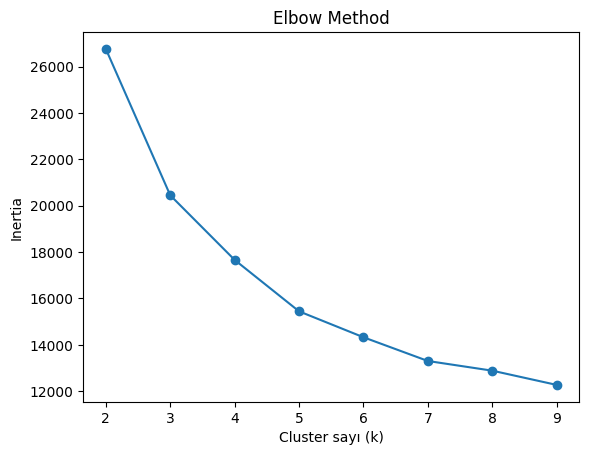

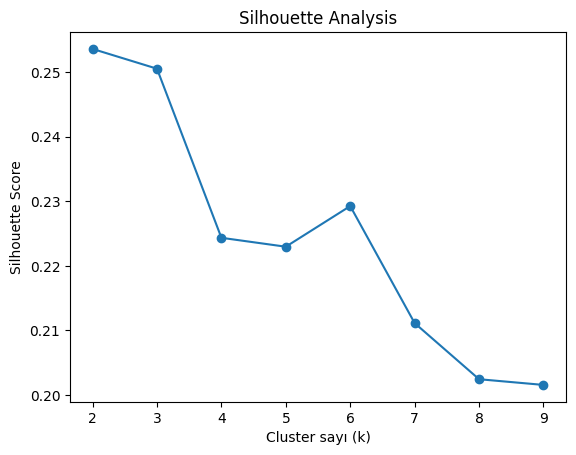

In [ ]:
# 4. Elbow metodu ilə ən yaxşı k seç
# -----------------------------
X_processed = preprocessor.fit_transform(X)

inertia = []
sil_scores = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_processed)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_processed, kmeans.labels_))

# Plot Elbow
plt.plot(K_range, inertia, marker="o")
plt.xlabel("Cluster sayı (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

# Plot Silhouette
plt.plot(K_range, sil_scores, marker="o")
plt.xlabel("Cluster sayı (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.show()



In [ ]:

# 5 Son KMeans modeli qur

best_k = 4  # Elbow + Silhouette nəticəsinə görə dəyiş
kmeans = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("cluster", KMeans(n_clusters=best_k, random_state=42))
])

kmeans.fit(X)
clusters = kmeans["cluster"].labels_

In [ ]:

# 6. Nəticəni datasetə əlavə et

df["Cluster"] = clusters

print(df.head())


   Age  Work_Experience  Family_Size Segmentation  Gender_Male  \
0   22         1.000000          4.0            D            1   
1   38         2.641663          3.0            A            0   
2   67         1.000000          1.0            B            0   
3   67         0.000000          2.0            B            1   
4   40         2.641663          6.0            A            0   

   Ever_Married_Yes  Graduated_Yes  Profession_B  Profession_C  Profession_D  \
0                 0              0      0.075826      0.109610      0.734985   
1                 1              1      0.270386      0.107296      0.251788   
2                 1              1      0.270386      0.107296      0.251788   
3                 1              1      0.253612      0.224719      0.205457   
4                 1              1      0.232877      0.155954      0.226554   

   Spending_Score_High  Spending_Score_Low   Var_1_B   Var_1_C   Var_1_D  \
0                    0                   1  0.

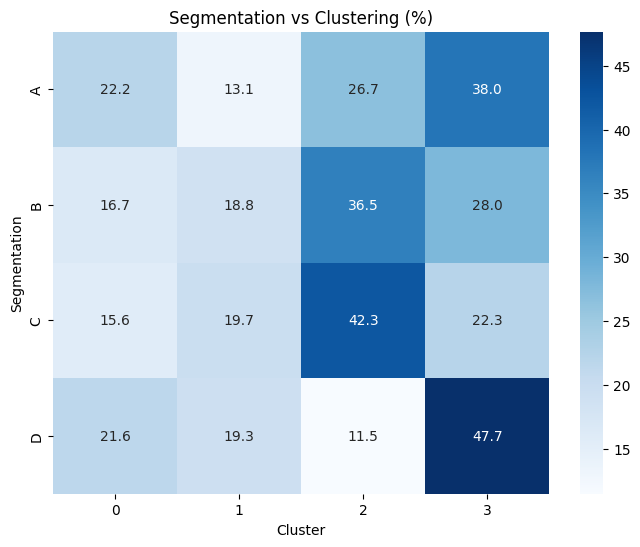

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate the crosstabulation and normalize to get percentages
crosstab_pct = pd.crosstab(df['Segmentation'], df['Cluster'], normalize='index') * 100

# Heatmap ile görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab_pct, annot=True, fmt='.1f', cmap='Blues')
plt.title('Segmentation vs Clustering (%)')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score

# K-means için farklı parametreler dene
param_grid = {
    'n_clusters': range(2, 8),
    'init': ['k-means++', 'random'],
    'n_init': [10, 20, 30]
}

best_score = -1
best_params = {}

for n_clusters in param_grid['n_clusters']:
    for init in param_grid['init']:
        for n_init in param_grid['n_init']:
            kmeans = KMeans(n_clusters=n_clusters, init=init, n_init=n_init, random_state=42)
            cluster_labels = kmeans.fit_predict(X_processed)
            score = silhouette_score(X_processed, cluster_labels)

            if score > best_score:
                best_score = score
                best_params = {'n_clusters': n_clusters, 'init': init, 'n_init': n_init}

print(f"Best parameters: {best_params}")
print(f"Best silhouette score: {best_score}")

Best parameters: {'n_clusters': 3, 'init': 'random', 'n_init': 10}
Best silhouette score: 0.250485697381017


In [ ]:
# En iyi parametrelerle model oluştur
best_kmeans = KMeans(n_clusters=3, init='random', n_init=10, random_state=42)
df['Cluster_Best'] = best_kmeans.fit_predict(X_processed)

# Yeni sonuçları değerlendirin
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

ari_best = adjusted_rand_score(df['Segmentation'], df['Cluster_Best'])
nmi_best = normalized_mutual_info_score(df['Segmentation'], df['Cluster_Best'])

print(f"Best model ARI: {ari_best:.3f}")
print(f"Best model NMI: {nmi_best:.3f}")

Best model ARI: 0.060
Best model NMI: 0.058


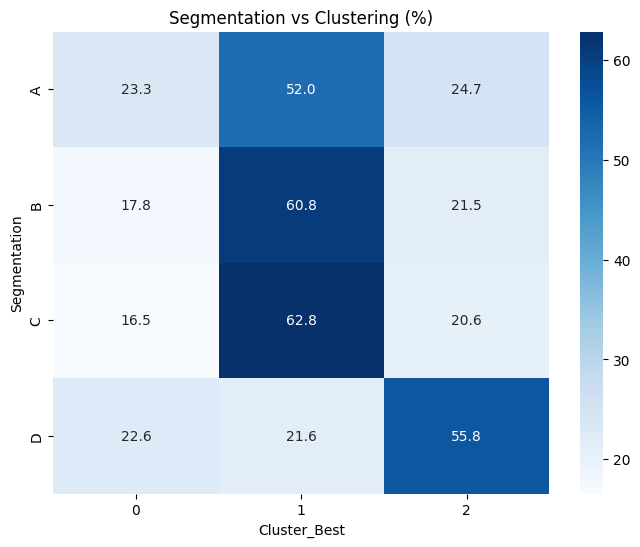

In [ ]:
# Calculate the crosstabulation and normalize to get percentages
crosstab_pct = pd.crosstab(df['Segmentation'], df['Cluster_Best'], normalize='index') * 100

# Heatmap ile görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab_pct, annot=True, fmt='.1f', cmap='Blues')
plt.title('Segmentation vs Clustering (%)')
plt.show()

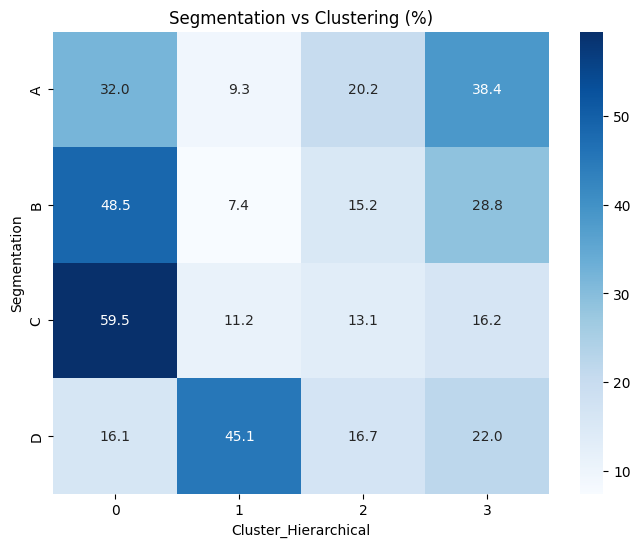

In [ ]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=4, linkage='ward')
df['Cluster_Hierarchical'] = hierarchical.fit_predict(X_processed)

# Calculate the crosstabulation and normalize to get percentages
crosstab_pct = pd.crosstab(df['Segmentation'], df['Cluster_Hierarchical'], normalize='index') * 100

# Heatmap ile görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab_pct, annot=True, fmt='.1f', cmap='Blues')
plt.title('Segmentation vs Clustering (%)')
plt.show()

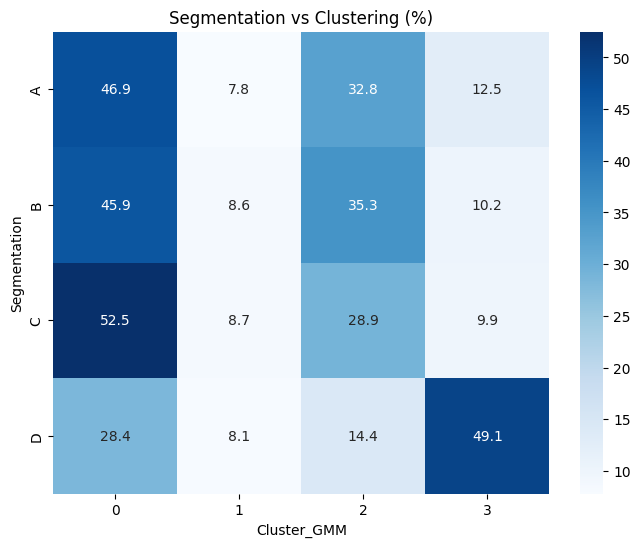

In [ ]:
# Gaussian Mixture Model
gmm = GaussianMixture(n_components=4, random_state=42)
df['Cluster_GMM'] = gmm.fit_predict(X_processed)

# Calculate the crosstabulation and normalize to get percentages
crosstab_pct = pd.crosstab(df['Segmentation'], df['Cluster_GMM'], normalize='index') * 100

# Heatmap ile görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab_pct, annot=True, fmt='.1f', cmap='Blues')
plt.title('Segmentation vs Clustering (%)')
plt.show()

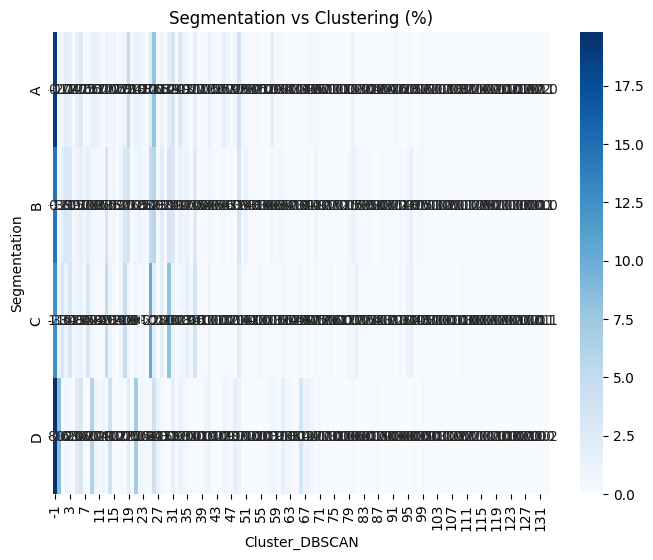

In [ ]:
# DBSCAN (otomatik küme sayısı)
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['Cluster_DBSCAN'] = dbscan.fit_predict(X_processed)


# Calculate the crosstabulation and normalize to get percentages
crosstab_pct = pd.crosstab(df['Segmentation'], df['Cluster_DBSCAN'], normalize='index') * 100

# Heatmap ile görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab_pct, annot=True, fmt='.1f', cmap='Blues')
plt.title('Segmentation vs Clustering (%)')
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from scipy.stats import mode
from sklearn.metrics import adjusted_rand_score

def ensemble_clustering(X, n_clusters=4):
    # Farklı algoritmalar
    algorithms = {
        'kmeans': KMeans(n_clusters=n_clusters, random_state=42),
        'hierarchical': AgglomerativeClustering(n_clusters=n_clusters),
        'spectral': SpectralClustering(n_clusters=n_clusters, random_state=42),
        'gmm': GaussianMixture(n_components=n_clusters, random_state=42)
    }

    cluster_results = {}
    for name, algo in algorithms.items():
        try:
            if name == 'gmm':
                cluster_results[name] = algo.fit_predict(X)
            else:
                cluster_results[name] = algo.fit_predict(X)
            print(f"{name} tamamlandı")
        except Exception as e:
            print(f"{name} hata: {e}")

    # Consensus clustering (çoğunluk oylaması)
    cluster_matrix = np.array(list(cluster_results.values())).T
    consensus_labels = []

    for i in range(len(cluster_matrix)):
        # En sık görülen küme etiketini seç
        most_common = mode(cluster_matrix[i], keepdims=False)[0]
        consensus_labels.append(most_common)

    return np.array(consensus_labels), cluster_results

ensemble_labels, individual_results = ensemble_clustering(X_processed)
df['Cluster_Ensemble'] = ensemble_labels

# Ensemble sonucunu değerlendir
ari_ensemble = adjusted_rand_score(df['Segmentation'], ensemble_labels)
print(f"Ensemble ARI: {ari_ensemble:.3f}")

kmeans tamamlandı
hierarchical tamamlandı
spectral tamamlandı
gmm tamamlandı
Ensemble ARI: 0.037


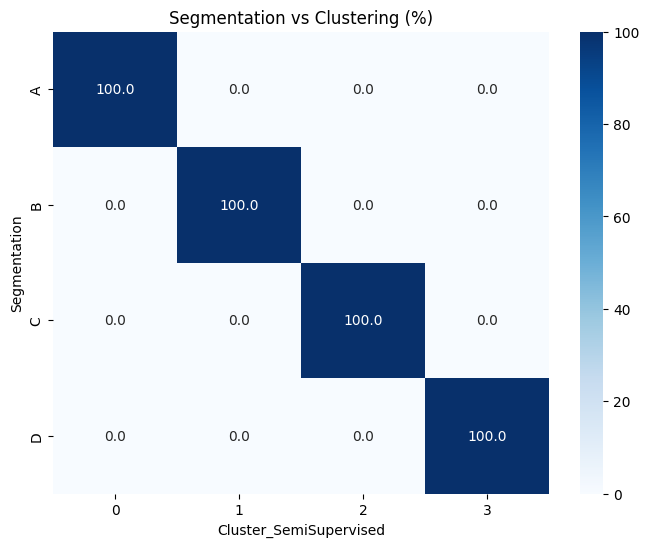

In [ ]:
from sklearn.semi_supervised import LabelSpreading
from sklearn.cluster import KMeans

# Mevcut segmentasyon bilgisini kullan
def semi_supervised_clustering(X, segments):
    # Segmentasyon bilgisini sayısal hale getir
    label_map = {'A': 0, 'B': 1, 'C': 2, 'D': 3}
    y_semi = [label_map.get(s, -1) for s in segments]

    # Label spreading ile eksik etiketleri tahmin et
    label_spreading = LabelSpreading(kernel='knn', n_neighbors=7)
    predicted_labels = label_spreading.fit(X, y_semi).transduction_

    return predicted_labels

# Kullanım
predicted_clusters = semi_supervised_clustering(X_processed, df['Segmentation'])
df['Cluster_SemiSupervised'] = predicted_clusters


# Calculate the crosstabulation and normalize to get percentages
crosstab_pct = pd.crosstab(df['Segmentation'], df['Cluster_SemiSupervised'], normalize='index') * 100

# Heatmap ile görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab_pct, annot=True, fmt='.1f', cmap='Blues')
plt.title('Segmentation vs Clustering (%)')
plt.show()

Ratio 0.2: ARI=0.146, Labeled=1612
Ratio 0.3: ARI=0.153, Labeled=2419
Ratio 0.4: ARI=0.177, Labeled=3226
Ratio 0.5: ARI=0.172, Labeled=4034


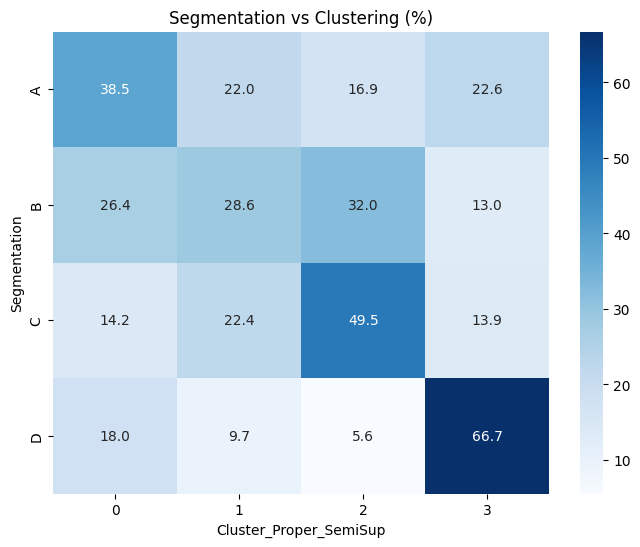

In [ ]:
from sklearn.semi_supervised import LabelSpreading
import numpy as np

def proper_semi_supervised_clustering(X, segments, labeled_ratio=0.2):
    """
    Sadece küçük bir kısım etiketli, geri kalanını tahmin et
    """
    label_map = {'A': 0, 'B': 1, 'C': 2, 'D': 3}
    n_samples = len(segments)

    # Her segmentten eşit oranda örnek seç
    y_semi = [-1] * n_samples  # Hepsi unlabeled başlasın

    for segment_label in ['A', 'B', 'C', 'D']:
        segment_indices = [i for i, s in enumerate(segments) if s == segment_label]
        n_to_label = max(1, int(len(segment_indices) * labeled_ratio))

        # Her segmentten rastgele birkaç örnek seç
        chosen_indices = np.random.choice(segment_indices, n_to_label, replace=False)

        for idx in chosen_indices:
            y_semi[idx] = label_map[segment_label]

    # Label Spreading uygula
    label_spreading = LabelSpreading(kernel='knn', n_neighbors=7, alpha=0.2)

    # Sadece labeled örneklerle fit et
    labeled_mask = np.array(y_semi) != -1
    if not any(labeled_mask):
        raise ValueError("Hiç labeled örnek yok!")

    # Fit ve predict
    label_spreading.fit(X[labeled_mask], np.array(y_semi)[labeled_mask])
    predicted_labels = label_spreading.predict(X)

    return predicted_labels, sum(labeled_mask)

# Doğru kullanım
try:
    # Daha fazla labeled data deneyin
    for ratio in [0.2, 0.3, 0.4, 0.5]:
        labels, n_labeled = proper_semi_supervised_clustering(
            X_processed, df['Segmentation'], labeled_ratio=ratio
    )
        ari = adjusted_rand_score(df['Segmentation'], labels)
        print(f"Ratio {ratio}: ARI={ari:.3f}, Labeled={n_labeled}")

    # Yeni crosstab
    crosstab_pct = pd.crosstab(df['Segmentation'], df['Cluster_Proper_SemiSup'], normalize='index') * 100

    # Heatmap ile görselleştirme
    plt.figure(figsize=(8, 6))
    sns.heatmap(crosstab_pct, annot=True, fmt='.1f', cmap='Blues')
    plt.title('Segmentation vs Clustering (%)')
    plt.show()

except Exception as e:
    print(f"Error: {e}")

In [ ]:
s